# Importing Libraries and Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_csv('/content/Data_Science_Internship - Dump.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3209 non-null   int64 
 1   Agent_id        3209 non-null   object
 2   status          3209 non-null   object
 3   lost_reason     2987 non-null   object
 4   budget          2869 non-null   object
 5   lease           3022 non-null   object
 6   movein          1933 non-null   object
 7   source          3209 non-null   object
 8   source_city     3209 non-null   object
 9   source_country  3209 non-null   object
 10  utm_source      3209 non-null   object
 11  utm_medium      3209 non-null   object
 12  des_city        3209 non-null   object
 13  des_country     3208 non-null   object
 14  room_type       1447 non-null   object
 15  lead_id         3208 non-null   object
dtypes: int64(1), object(15)
memory usage: 401.2+ KB


# Data Cleaning



Removing the non-significant columns

In [ ]:
df = df.drop(columns = ['Unnamed: 0', 'lost_reason','movein', 'lead_id'], axis = 1)

Dropping Room Type column as well because almost 50% value are null

In [ ]:
df = df.drop(columns = ['room_type'], axis = 1)

Dropping Nan rows of Budget and Lease column

In [ ]:
df = df.dropna()

In [ ]:
import re

Replacing values like £121 - £180 Per Week with the average of lower and higher limits.



In [ ]:
pattern = r'^£\d+ - £\d+ Per \w+eek$'
matches = df['budget'].str.match(pattern)
repattern = r'^£(\d+) - £(\d+) Per \w+eek$'

for i in range(len(df)):
  if matches.iloc[i]:

    match = re.match(repattern, df.budget.iloc[i])
    lower = int(match.group(1))
    upper = int(match.group(2))

    df.budget.iloc[i] = (lower + upper) / 2

Replacing values like 0-0 with 0.

In [ ]:
df['budget']= df.budget.replace(to_replace = '0-0', value = 0)

Replacing values like > 300£ Per Week with 300.

In [ ]:
df['budget']= df.budget.replace(to_replace = '> 300£ Per Week', value = 300)

Replacing values like 0-100 with the average of lower and higher limits.



In [ ]:
pattern = r'^\d+-\d+$'
matches = df['budget'].astype(str).str.match(pattern)

for i in range(len(df)):
  if matches.iloc[i]:

    lower, upper = map(int, re.split('-', str(df.budget.iloc[i])))

    df.budget.iloc[i] = (lower + upper) / 2

Removing abnormal Budget Data with very small reappearance
  

In [ ]:
pattern = r'^\d+(\.\d)?$'
matches = df['budget'].astype(str).str.match(pattern)
matches

2       True
3       True
5       True
6       True
7       True
        ... 
3203    True
3204    True
3205    True
3206    True
3207    True
Name: budget, Length: 2864, dtype: bool

In [ ]:
df = df.loc[matches]

Removing Options other than Won and Lost from status column

In [ ]:
df['status'].value_counts()

LOST           2522
WON             189
OPPORTUNITY      14
CONTACTED         1
Name: status, dtype: int64

In [ ]:
df = df[df['status'].isin(['LOST', 'WON'])]

Encoding the status column -

WON = 1
LOST = 0

In [ ]:
df['status']= df.status.replace(to_replace = 'WON', value = 1)
df['status']= df.status.replace(to_replace = 'LOST', value = 0)

In [ ]:
df.lease.value_counts()

Full Year Course Stay 40 - 44 weeks           625
Complete Education Year Stay 50 - 52 weeks    433
0                                             330
51                                            250
Semester Stay 20 - 24 weeks                   195
                                             ... 
2 years                                         1
10                                              1
2 weeks                                         1
short stay                                      1
44 WEEKS                                        1
Name: lease, Length: 81, dtype: int64

Cleaning the data of lease column

In [ ]:
df['lease']= df.lease.replace(to_replace = 'Full Year Course Stay 40 - 44 weeks', value = 42)
df['lease']= df.lease.replace(to_replace = 'Complete Education Year Stay 50 - 52 weeks', value = 51)
df['lease']= df.lease.replace(to_replace = 'Semester Stay 20 - 24 weeks', value = 22)
df['lease']= df.lease.replace(to_replace = 'Summer/Short Stay 8 - 12 weeks', value = 10)
df['lease']= df.lease.replace(to_replace = 'semester-stay', value = 22)
df['lease']= df.lease.replace(to_replace = 'short-stay', value = 10)
df['lease']= df.lease.replace(to_replace = '51 weeks', value = 51)
df['lease']= df.lease.replace(to_replace = '44 weeks', value = 44)
df['lease']= df.lease.replace(to_replace = '24-36', value = 30)
df['lease']= df.lease.replace(to_replace = 'full year stay', value = 53)
df['lease']= df.lease.replace(to_replace = '12-24', value = 18)
df['lease']= df.lease.replace(to_replace = '1 year', value = 53)
df['lease']= df.lease.replace(to_replace = '<=8', value = 8)
df['lease']= df.lease.replace(to_replace = '40 - 44 weeks', value = 42)

Dropping Rows in lease column like other, full course stay and lease because duration for these is unknown

In [ ]:
df = df[~df['lease'].isin(['lease', 'full-course-stay','Other','other','0'])]

Removing abnormal data from lease column

In [ ]:
pattern = r'^\d+(\.\d)?$'
matches = df['lease'].astype(str).str.match(pattern)
matches

2       True
5       True
7       True
8       True
9       True
        ... 
3202    True
3203    True
3204    True
3206    True
3207    True
Name: lease, Length: 2092, dtype: bool

In [ ]:
df = df.loc[matches]

Converting Status, lease and budget column to int from str

In [ ]:
df['budget'] = df['budget'].astype(float)
df['lease'] = df['lease'].astype(float)
df['status'] = df['status'].astype(int)

Removing the value = '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'

from different columns

In [ ]:
df = df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', pd.NaT)

In [ ]:
df = df.dropna()

In [ ]:
df

,Agent_id,status,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,150.5,42.0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,0,120.0,22.0,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
7,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,0,210.5,51.0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
8,ab6bb4584e9946b135dca2e39d12abba3ea82d5ea927d0...,0,100.0,22.0,869105a4ce02fc56897c8d7e1eb37736b95e3e826568ae...,4fa64bd55d5c0c1f83015952b4b9500cb099dd0b1b0464...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
9,131127203c89e8219dbdfe2f597538759310f40918b222...,0,270.0,51.0,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,39ae78ec341cd996f93df88fa4729284d087ccd4491308...,dfaa6c4bc17102b34903db6d3b2e666f4c50be11c7ee6e...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,bf5ade33b5b472c3599473a5cb4e5c7037e4c73296b7e9...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
...,...,...,...,...,...,...,...,...,...,...,...
3202,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,0,280.0,51.0,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,592e27e27927b8563b68af3bd4ee584077fe640d182dde...,f782d1dbfba17a52a417972d81ef55a8bc60090f4bfbcc...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,69f81619d0ef92cbb165a44e76f4f0c284d2aa83c318fa...,874523a7284bc49124fd6951e8d2f5825643ce5987161c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
3203,a04f132c7c93df8b0d896a5334fd89ad933ea7747ff70c...,0,300.0,42.0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,0c11e50e335b9ab8eb52d444d5f1e1a47fa096594883c1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
3204,9ab9b659a836589f715b72165b0d32cad846412e62851c...,0,90.0,51.0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b384863fa1f6e091164b74219726eee0b9dd47776b91a4...,e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f9bfb92c288658941063ed2dfc7feca398a9df1623a428...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
3206,f1ece3b02f1e5989bb0918e468fbc3f3e60d74ed90809d...,0,90.0,42.0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,c384826dfbfce62c3fd99a46984a56fe71546a85c2cb6c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...


# Data Analysis

Plotting the Heatmap

<Axes: >

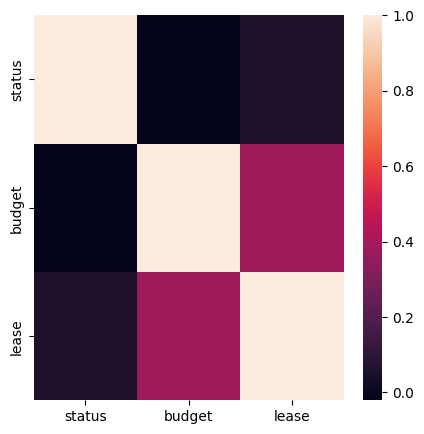

In [ ]:
correlation = df.corr()
plt.figure(figsize = (5,5))
sns.heatmap(correlation)

<Axes: title={'center': 'Distribution Plot of the Budget'}, xlabel='budget', ylabel='Density'>

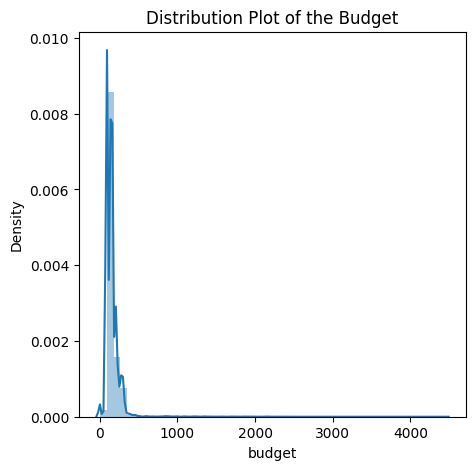

In [ ]:
plt.figure(figsize = (5,5))
plt.title('Distribution Plot of the Budget')
sns.distplot(df['budget'])

<Axes: title={'center': 'Distribution Plot of the Lease Period'}, xlabel='lease', ylabel='Density'>

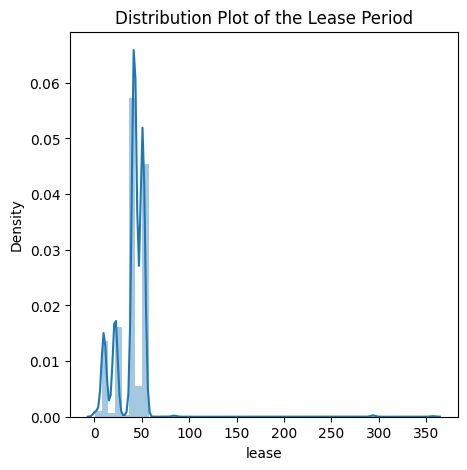

In [ ]:
plt.figure(figsize = (5,5))
plt.title('Distribution Plot of the Lease Period')
sns.distplot(df['lease'])

# Label Encoding and solving the class Imbalance problem


Now encoding all the columns other than status, lease and budget

In [ ]:
encoder = LabelEncoder()

In [ ]:
for i in df.columns:
  if i not in ['status', 'lease', 'budget']:
    df[i] = encoder.fit_transform(df[i])

In [ ]:
df

,Agent_id,status,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country
2,76,0,150.5,42.0,44,1975,153,17,2,14,6
5,13,0,120.0,22.0,45,1583,92,17,2,162,6
7,25,0,210.5,51.0,44,1716,153,17,2,93,6
8,67,0,100.0,22.0,49,1011,92,17,2,59,6
9,5,0,270.0,51.0,57,738,151,17,2,128,6
...,...,...,...,...,...,...,...,...,...,...,...
46598,36,0,90.0,42.0,44,2993,153,17,2,28,6
46599,99,0,90.0,22.0,44,849,153,17,2,4,6
46605,4,0,270.5,42.0,44,1600,92,17,2,157,6
46606,53,0,1108.0,294.0,83,2954,122,13,17,157,6


The dataset is highly unbalanced

In [ ]:
df.status.value_counts()

0    21365
1     1847
Name: status, dtype: int64

In [ ]:
leads_won = df[df.status == 1]
leads_loss = df[df.status == 0]

In [ ]:
leads_loss.shape, leads_won.shape

((21365, 11), (1847, 11))

In [ ]:
leads_loss_sample = leads_loss.sample(n = 1847)

In [ ]:
df = pd.concat([leads_won, leads_loss_sample], axis = 0)

In [ ]:
df.status.value_counts()

1    1847
0    1847
Name: status, dtype: int64

# Train Test Split and Standardizing the data

In [ ]:
X = df.drop(columns = ['status'], axis = 1)
Y  = df['status']

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2, stratify = Y)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2955, 10), (739, 10), (2955,), (739,))

In [ ]:
Y_train.value_counts()

1    1478
0    1477
Name: status, dtype: int64

In [ ]:
Y_test.value_counts()

0    370
1    369
Name: status, dtype: int64

# Training the model

In [ ]:
model = RandomForestClassifier(n_estimators = 100)

In [ ]:
model1 = LogisticRegression()

In [ ]:
model2 = svm.SVC(kernel = 'rbf', probability=True)

In [ ]:
model3 = Lasso()

In [ ]:
from pandas.core.common import random_state
#to ensure the repeatability of the code and results and the methodology of execution
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
clf1=BaggingClassifier(random_state=1)
clf2=RandomForestClassifier(random_state=1)
clf3=GradientBoostingClassifier(random_state=1)

model4=VotingClassifier(estimators=[('bc',clf1),('rf',clf2),('gb',clf3)])

In [ ]:
import xgboost as xgb
#from sklearn.metrics import mean_squared_error
model5=xgb.XGBClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(criterion='gini',splitter='best')

In [ ]:
model2.fit(X_train, Y_train)

SVC(probability=True)

# Evaluating

Precision measures how many of the predicted positive instances are actually positive.

Recall measures how many of the actual positive instances were predicted correctly.

F1-score is the harmonic mean of precision and recall. These metrics are particularly useful for evaluating binary classification models.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_data_prediction = model2.predict(X_train)
test_data_prediction = model2.predict(X_test)

In [ ]:
# Calculate accuracy
train_acc = accuracy_score(Y_train, train_data_prediction)
test_acc = accuracy_score(Y_test, test_data_prediction)

# Calculate precision
train_prec = precision_score(Y_train, train_data_prediction)
test_prec = precision_score(Y_test, test_data_prediction)

# Calculate recall
train_rec = recall_score(Y_train, train_data_prediction)
test_rec = recall_score(Y_test, test_data_prediction)

# Calculate F1-score
train_f1 = f1_score(Y_train, train_data_prediction)
test_f1 = f1_score(Y_test, test_data_prediction)

In [ ]:
print("Training set evaluation:")
print("Accuracy: {:.4f}".format(train_acc))
print("Precision: {:.4f}".format(train_prec))
print("Recall: {:.4f}".format(train_rec))
print("F1-score: {:.4f}".format(train_f1))

print("\nTest set evaluation:")
print("Accuracy: {:.4f}".format(test_acc))
print("Precision: {:.4f}".format(test_prec))
print("Recall: {:.4f}".format(test_rec))
print("F1-score: {:.4f}".format(test_f1))

Training set evaluation:
Accuracy: 0.6362
Precision: 0.6083
Recall: 0.7659
F1-score: 0.6780

Test set evaluation:
Accuracy: 0.6049
Precision: 0.5839
Recall: 0.7263
F1-score: 0.6473


# Assigning Scores to the leads


In [ ]:
train_pred_proba = model2.predict_proba(X)

Probability = []

for i in range(len(X)):
  Probability.append(train_pred_proba[i][1])

In [ ]:
df = df.reset_index()
df['Lead_score'] = pd.Series(Probability)*100
df = df.sort_values('Lead_score', ascending=False)

In [ ]:
df.head(10)

,index,Agent_id,status,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,Lead_score
555,16123,75,1,130.0,51.0,68,1184,92,17,2,73,6,73.873905
3631,38535,51,0,123.0,51.0,57,1045,84,17,2,81,6,72.667372
606,17548,88,1,99.0,51.0,57,483,92,17,2,122,6,72.227997
1114,29385,55,1,145.0,51.0,57,2463,153,17,2,70,6,72.199916
875,25344,75,1,150.0,51.0,68,2993,153,17,2,77,6,71.565967
156,4322,45,1,150.0,51.0,57,2989,153,17,2,91,6,71.425582
35,1013,27,1,123.0,51.0,57,3133,153,17,2,73,6,71.285041
627,18097,57,1,155.0,51.0,57,2463,153,17,2,91,6,71.226217
682,19296,67,1,158.0,51.0,57,2605,153,17,2,91,6,71.020997
1794,45456,93,1,154.0,51.0,65,1469,153,17,2,84,6,70.843048


<Axes: title={'center': 'Distribution Plot of the Lead Score'}, xlabel='Lead_score', ylabel='Density'>

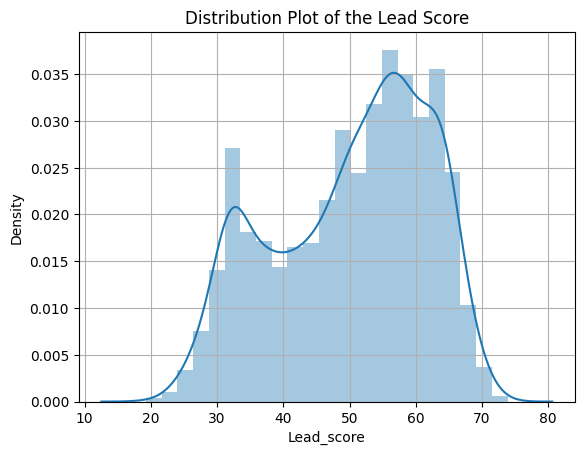

In [ ]:
plt.grid()
plt.title('Distribution Plot of the Lead Score')
sns.distplot(df['Lead_score'])

<Axes: title={'center': 'Correlation between the Budget, Lease, and Lead Score'}>

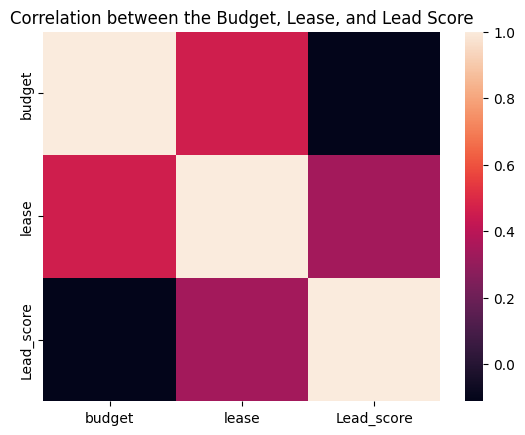

In [ ]:
corr = df[['budget', 'lease','Lead_score']].corr()
plt.title('Correlation between the Budget, Lease, and Lead Score')
sns.heatmap(corr)